# Support Vector Machine


Support Vector Machine

sklern.svm
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

使用するライブラリをインポート

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from generate_clusters import cluster_gen

生成するサンプルのクラスタをSEEDで調整
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [19]:
np.random.seed(424) # Change the number to generate a different cluster.oritinal sample 424

In [20]:
n_clusters = 4
clusters_x, clusters_y, labels = cluster_gen(n_clusters)

# Convert to a training dataset in sklearn format
X = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
y = np.float32((np.concatenate(labels)))

Model change
Base 
ker = 'linear'
Refer below for other models.
http://scikit-learn.org/stable/modules/svm.html

In [23]:
# Create an instance of SVM and fit the data.
ker = 'poly'
svc = svm.SVC(kernel=ker).fit(X, y)

Text(0.5,1,'SVC with poly kernel')

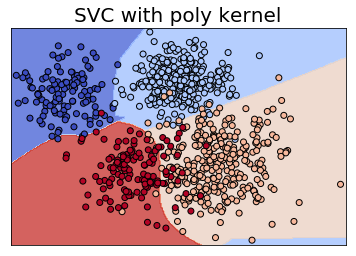

In [24]:
# Create a mesh that we will use to colorfully plot the decision surface
# Plotting Routine courtesy of: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# Note: this coloring scheme breaks down at > 7 clusters or so

h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # -1 and +1 to add some margins
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each block of the mesh (used to assign its color)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with '+ker+' kernel', fontsize=20)